## PyTorch-CNN

**CNN (Convolutional Neural Networks)** is a very useful neural network architecture for computer vision problems.
In this notebook we will experiment with CNNs in PyTorch on classic MNIST dataset.

In [1]:
#Perform imports
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Download MNIST dataset using torchvision
transform = transforms.ToTensor()

train_data = datasets.MNIST(root='./', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./', train=False, download=True, transform=transform)

In [3]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./
    Split: Test
    StandardTransform
Transform: ToTensor()

In [5]:
#Lets look at the first element of the data
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [6]:
image, label = train_data[0]
print('Shape:', image.shape, '\nLabel:', label)

Shape: torch.Size([1, 28, 28]) 
Label: 5


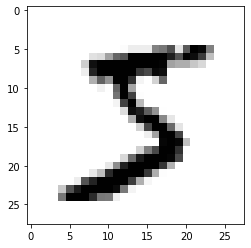

In [7]:
plt.imshow(train_data[0][0].reshape((28,28)), cmap="gist_yarg");

In [8]:
#Lets create dataloaders with batch_size=10
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [9]:
#Train_loader if of length 60000/10=6000
len(train_loader)

6000

In [19]:
#Lets make a CNN
#CNN will have two Convolutional layers
#Three fully connected layers 
#And two max pool layers
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 10, 3, 1)
        self.conv2 = nn.Conv2d(10, 20, 3, 1)
        
        self.fc1 = nn.Linear(5*5*20,250)
        self.fc2 = nn.Linear(250,100)
        self.fc3 = nn.Linear(100,10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        
        X = X.view(-1, 5*5*20)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [15]:
conv1 = nn.Conv2d(1, 10, 3, 1)
conv2 = nn.Conv2d(10, 20, 3, 1)

In [18]:
#Lets look at the size of tesnors at each stage
for i, (X_train, y_train) in enumerate(train_data):
    break
x = X_train.view(1,1,28,28)
print(x.shape)
x = F.relu(conv1(x))
print(x.shape)
x = F.max_pool2d(x, 2, 2)
print(x.shape)
x = F.relu(conv2(x))
print(x.shape)
x = F.max_pool2d(x, 2, 2)
print(x.shape)

torch.Size([1, 1, 28, 28])
torch.Size([1, 10, 26, 26])
torch.Size([1, 10, 13, 13])
torch.Size([1, 20, 11, 11])
torch.Size([1, 20, 5, 5])


In [21]:
#Instantiate the model
torch.manual_seed(42)
model = CNN()
model

CNN(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=500, out_features=250, bias=True)
  (fc2): Linear(in_features=250, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)

In [22]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')
count_parameters(model)

    90
    10
  1800
    20
125000
   250
 25000
   100
  1000
    10
______
153280


In [23]:
#define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [25]:
#Train the model

epochs = 10
train_losses = []
test_losses = []

for i in range(epochs):
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):    
        # Apply the model
        y_pred = model(X_train)  # we don't flatten X-train here
        loss = criterion(y_pred, y_train)
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    train_losses.append(loss)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            # Apply the model
            y_val = model(X_test)
            loss = criterion(y_val, y_test)
            
    test_losses.append(loss)
    print(f"Epoch={i},TrainLoss={train_losses[-1]:0.3},TestLoss={test_losses[-1]:0.3}") 

Epoch=0,TrainLoss=0.00698,TestLoss=2.03e-05
Epoch=1,TrainLoss=0.000897,TestLoss=0.00139
Epoch=2,TrainLoss=3.05e-06,TestLoss=9.45e-06
Epoch=3,TrainLoss=1.58e-05,TestLoss=2.46e-05
Epoch=4,TrainLoss=2.39e-05,TestLoss=2.72e-05
Epoch=5,TrainLoss=4.12e-05,TestLoss=7.15e-08
Epoch=6,TrainLoss=0.000408,TestLoss=3.03e-06
Epoch=7,TrainLoss=0.0114,TestLoss=0.0
Epoch=8,TrainLoss=0.00141,TestLoss=1.18e-05
Epoch=9,TrainLoss=5.6e-05,TestLoss=3.08e-06


In [26]:
#Test set accuracy
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test)  # we don't flatten the data this time
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 9898/10000 =  98.980%
